# **Shomi Shor - 316328236**

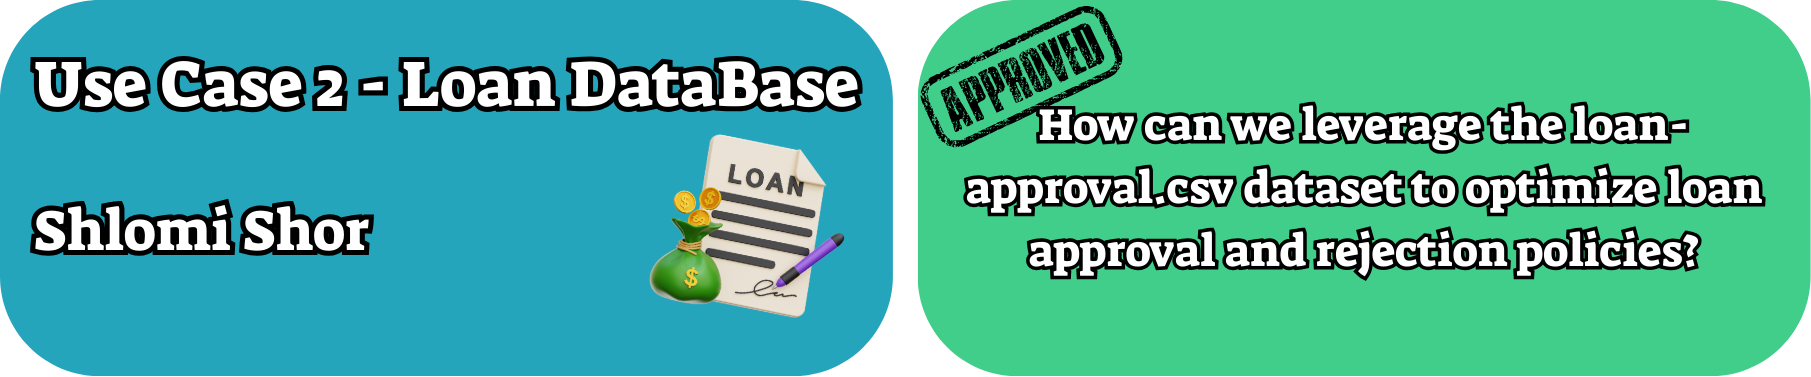

**Introduction -**
1. According to the statistical model, for me a sample is over 30 observations.

# **Loading the database -**

In [84]:
!pip install adjustText

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LinearSegmentedColormap

In [86]:
from google.colab import files

upladed = files.upload()

Saving loanDataBase1.xlsx to loanDataBase1 (1).xlsx


In [87]:
df = pd.read_excel("loanDataBase1.xlsx")

# **General Analysis**

In [88]:
df = pd.read_excel("loanDataBase1.xlsx")

df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [89]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [90]:
print(df.dtypes)

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


**Dataset Variables and Descriptions**

[Loan DataBase](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data://)

1. id - Customer identifier.
2. person_age - Customer's age.
3. person_income - Customer's annual income.
4. person_home_ownership - Type of home ownership (RENT/OWN/OTHER).
5. person_emp_length - Years of employment experience.
6. loan_intent - Purpose of the loan (Education, Medical, Personal, etc.).
7. loan_grade - Credit grade of the loan (A, B, C...).
8. loan_amnt - Loan amount.
9. loan_int_rate - Loan interest rate.
10. loan_percent_income - Percentage of income allocated to loan repayment.
11. cb_person_default_on_file - History of default (Y/N)
12. cb_person_cred_hist_length - Length of credit history (in years)
13. loan_status - Loan status (1 = Approved, 0 = Rejected).


In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [92]:
# Checking and displaying the number of missing (NaN) values in each column of the dataset.

df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


No missing values

In [93]:
# Checking that each loan application ID appears only once in the dataset.

id_counts = df['id'].value_counts()
print(id_counts[id_counts > 1])

Series([], Name: count, dtype: int64)


In [94]:
# Counting the number of loan applications.

df["id"].count()

58645

In [95]:
# Displaying Loan Approval and Rejection Statistics.

loan_status_counts = df["loan_status"].value_counts()

loan_status_percentage = (loan_status_counts / loan_status_counts.sum()) * 100

print(f'Loan Status Count:\n{loan_status_counts.to_string()}')
print(f'\nPercentage of Approved vs. Rejected Loans:\n{loan_status_percentage.round(2).to_string()}')

Loan Status Count:
loan_status
0    50295
1     8350

Percentage of Approved vs. Rejected Loans:
loan_status
0    85.76
1    14.24


In [96]:
# Count the number of primary loan purposes in the database.

df["loan_intent"].value_counts()

,count
loan_intent,
EDUCATION,12271
MEDICAL,10934
PERSONAL,10016
VENTURE,10011
DEBTCONSOLIDATION,9133
HOMEIMPROVEMENT,6280


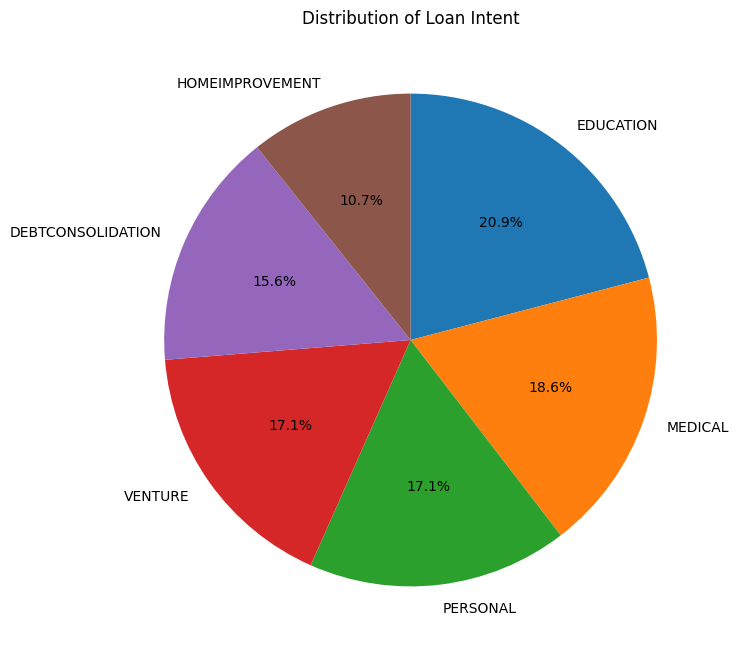

In [97]:
loan_intent_counts = df["loan_intent"].value_counts()

plt.figure(figsize=(8, 8))
loan_intent_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Distribution of Loan Intent")
plt.ylabel("")
plt.show()

In [98]:
print(f'The biggest age in the database: {df["person_age"].max()} years old')
print(f'The lowest age in the database: {df["person_age"].min()} years old')

The biggest age in the database: 123 years old
The lowest age in the database: 20 years old


In [99]:
count_by_age = df["person_age"].value_counts()

print(count_by_age)

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64


In [100]:
count_by_age_precentge = (count_by_age / count_by_age.sum()) * 100
print(count_by_age_precentge.round(2))

person_age
23     13.17
22     12.02
24     10.90
25      8.64
27      7.59
26      6.61
28      6.32
29      5.58
30      3.98
31      3.27
21      3.06
32      2.67
33      2.23
36      1.90
34      1.78
37      1.69
35      1.47
38      1.27
39      0.91
40      0.75
41      0.74
43      0.55
42      0.50
44      0.39
46      0.28
45      0.28
47      0.21
48      0.17
53      0.13
51      0.12
50      0.11
52      0.11
54      0.10
49      0.10
58      0.06
55      0.06
56      0.05
60      0.05
57      0.04
65      0.02
61      0.02
20      0.02
66      0.02
64      0.02
70      0.02
62      0.01
69      0.01
59      0.01
73      0.01
84      0.00
80      0.00
76      0.00
123     0.00
Name: count, dtype: float64


**Top 9 Loan Application Ages + Other (Count):**
23        7726
22        7051
24        6395
25        5067
27        4450
26        3874
28        3707
29        3270
30        2333
Other    14772
dtype: int64

**Top 9 Loan Application Ages + Other (Percentage):**
23       13.17
22       12.02
24        10.9
25        8.64
27        7.59
26        6.61
28        6.32
29        5.58
30        3.98
Other    25.19
dtype: object%


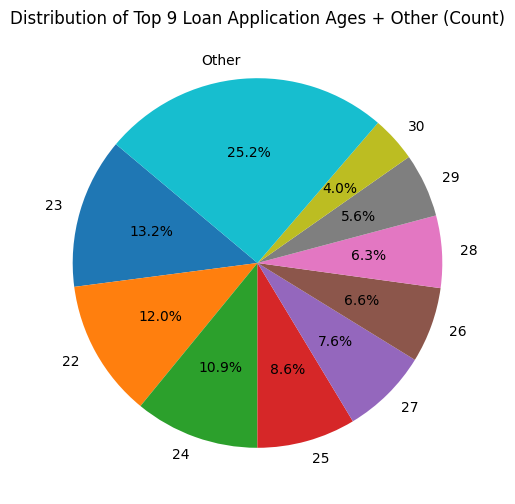

In [101]:
# Top 9 Loan Application Ages with 'Other' Category.

count_by_age = df["person_age"].value_counts()

count_by_age_percentage = (count_by_age / count_by_age.sum()) * 100

top_9_ages = count_by_age.nlargest(9)
top_9_percentages = count_by_age_percentage.nlargest(9)

other_count = count_by_age.sum() - top_9_ages.sum()
other_percentage = 100 - top_9_percentages.sum()

top_10_ages = pd.concat([top_9_ages, pd.Series({"Other": other_count})])
top_10_percentages = pd.concat([top_9_percentages, pd.Series({"Other": other_percentage})])

print(f"**Top 9 Loan Application Ages + Other (Count):**\n{top_10_ages}\n")
print(f"**Top 9 Loan Application Ages + Other (Percentage):**\n{top_10_percentages.round(2).astype(str)}%")

# Pie chart

plt.figure(figsize=(6, 6))
plt.pie(
    top_10_ages.values,
    labels=top_10_ages.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Top 9 Loan Application Ages + Other (Count)')
plt.show()

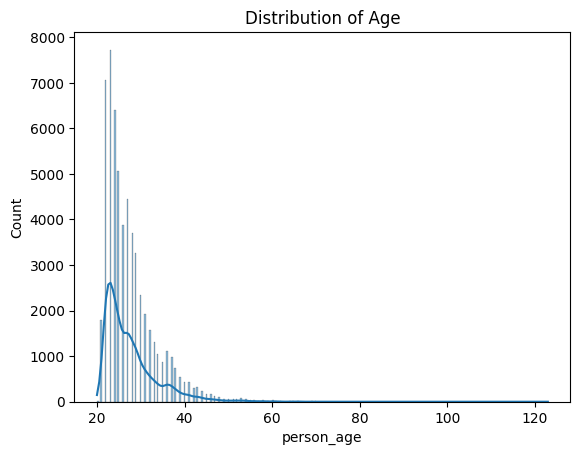

In [102]:
# Distribution of Age.

sns.histplot(df['person_age'], kde=True)
plt.title("Distribution of Age")
plt.show()

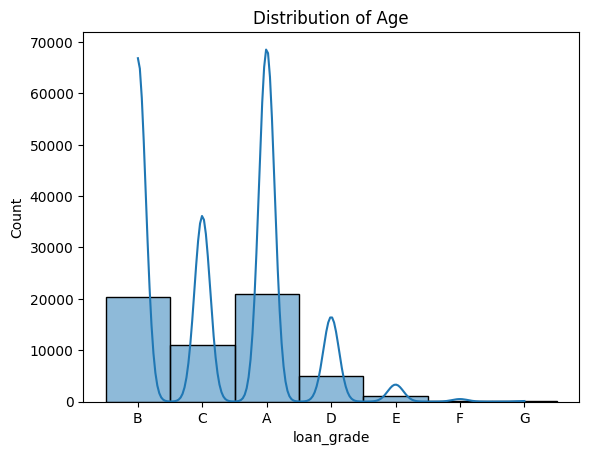

In [103]:
# Distribution of Age.

sns.histplot(df['loan_grade'], kde=True)
plt.title("Distribution of Age")
plt.show()

In [104]:
df["loan_grade"].value_counts()

,count
loan_grade,
A,20984
B,20400
C,11036
D,5034
E,1009
F,149
G,33


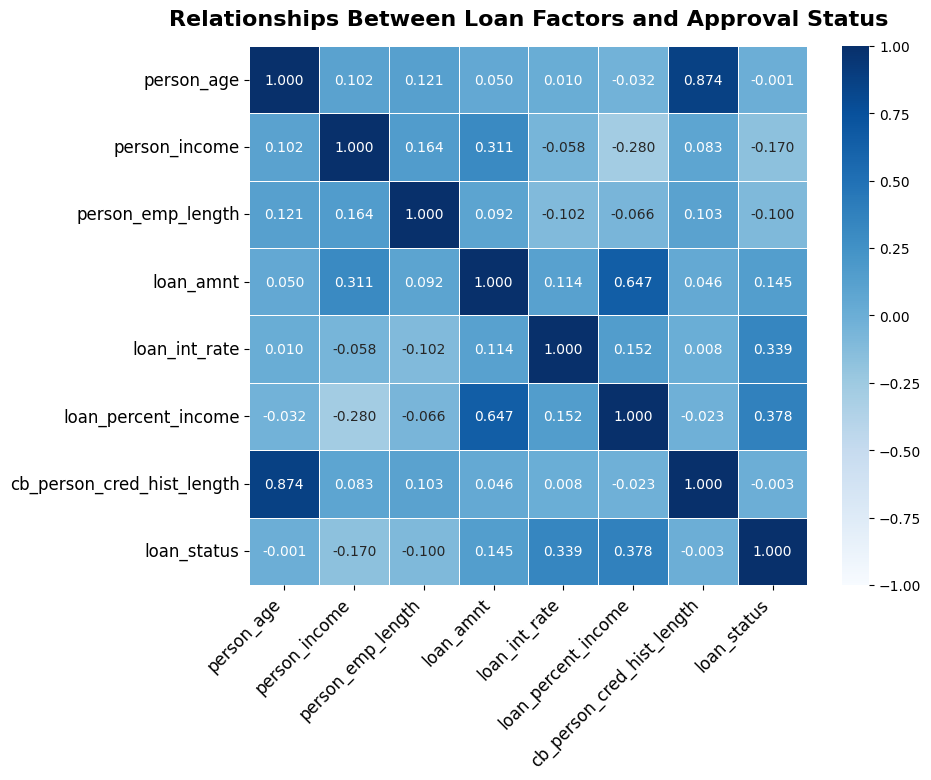

In [105]:
# Relationships Between Loan Factors and Approval Status.

numeric_cols_corr = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'loan_status'
]

corr_matrix = df[numeric_cols_corr].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".3f", linewidths=0.5, vmin=-1, vmax=1)


plt.title("Relationships Between Loan Factors and Approval Status", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


## Insight Conclusion

**Key Observations:**

---



1. **Data Cleanliness:** The dataset is clean, with no duplicate records or missing values, ensuring reliable and accurate analysis.
2. **Approval/Denial Rates:** Out of a total of 58,645 loan applications, 50,295 (85.76%) were denied, while 8,350 (14.24%) were approved.
3. **Loan Purpose:** The majority of applications were for educational purposes (20.9%), while the least common purpose was for home improvement (10.7%).
4. **Age Range:** The youngest applicant was 20 years old, and the oldest was 123 years old. However, the majority of applications (74.81%) were submitted by individuals aged 23-30, with the peak number of applications coming from those aged 22-25. The number of applications from individuals over 60 years old was almost negligible.
5. **Credit Ratings:** The most common credit ratings among applicants were A and B.

**Insights from a correlation graph:**

---

1. **Credit History Length and Age (0.874):**
There is a very strong positive correlation between an individual's age and the length of their credit history. This is an expected result, as older individuals are likely to have longer credit histories.
2. **Loan Amount and Percentage of Income Allocated to Loan (0.647):**
A strong positive correlation indicates that higher loan amounts are associated with a higher percentage of income allocated to loan repayments.
3. **Percentage of Income Allocated to Loan and Loan Status (0.378):**
The higher the percentage of income allocated to loan repayment, the more likely the loan is to be approved. This could suggest that credit institutions perceive a higher allocated income percentage as an indicator of stronger repayment capability.
4. **Loan Interest Rate and Loan Status (0.339):**
A moderate positive correlation suggests that higher interest rates are associated with a higher likelihood of loan approval. Lenders might be willing to take on more risk when higher interest rates compensate for that risk.
5. **Age and Loan Status (-0.001):**
There is no significant correlation between an applicant's age and loan approval status.
6. **Credit History Length and Loan Status (-0.003):**
The length of credit history has an almost negligible impact on loan approval status.
7. **Income and Loan Status (-0.170):**
This is a surprising finding—higher income levels are slightly associated with lower loan approval rates. This may be because higher-income individuals tend to request larger loan amounts, which are perceived as higher risk.

**Conclusion:**

---
The analysis indicates a strict loan approval system, with high rejection rates and a concentration of applications among young individuals aged 23-30. A higher percentage of income allocated to the loan and higher interest rates contribute to approval likelihood, while high income alone actually reduces the chances of approval. Additionally, age and credit history length have minimal impact on loan approval probabilities.

# **Loan Approval: Between a High-Risk Profile and a Safe Profile**

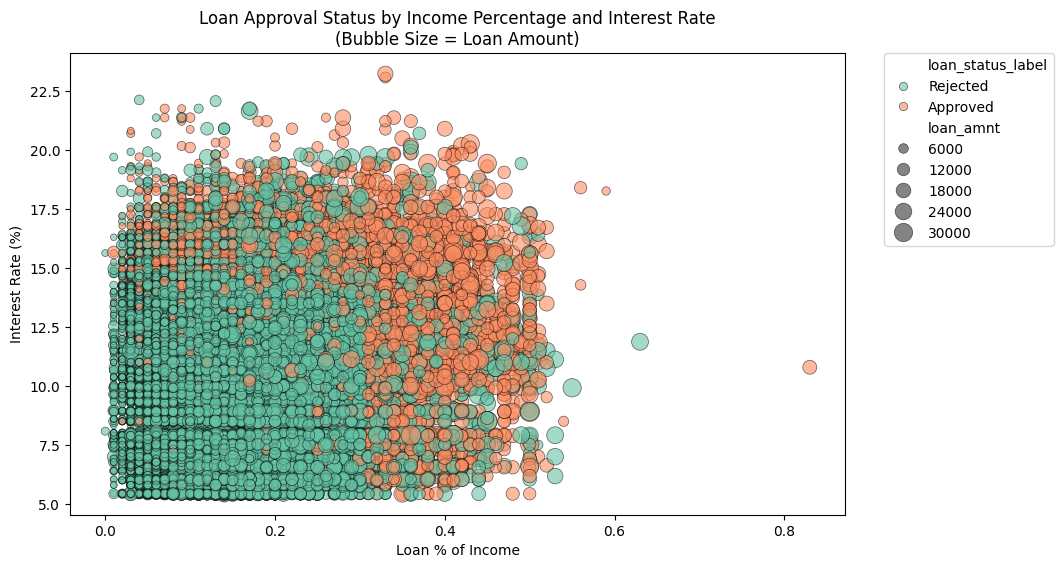

In [106]:
# The code generates a scatter plot showing loan approval status based on income percentage and interest rate, with bubble size representing the loan amount.

df['loan_status_label'] = df['loan_status'].map({0: 'Rejected', 1: 'Approved'})

plt.figure(figsize=(10, 6))
sns.scatterplot( data=df,x='loan_percent_income', y='loan_int_rate', size='loan_amnt', sizes=(20, 200), hue='loan_status_label', palette='Set2', alpha=0.6, edgecolor='black',linewidth=0.5)

plt.title("Loan Approval Status by Income Percentage and Interest Rate\n(Bubble Size = Loan Amount)")
plt.xlabel("Loan % of Income")
plt.ylabel("Interest Rate (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [107]:
bins_income = [0, 0.1, 0.2, 0.3, 0.4, 1.0]
labels_income = ['0-10%', '10-20%', '20-30%', '30-40%', '+40%']

df['loan_percent_income_bin'] = pd.cut(
    df['loan_percent_income'],
    bins=bins_income,
    labels=labels_income,
    include_lowest=True
)

In [108]:
bins_int_rate = [0, 10, 15, 100]
labels_int_rate = ['0-10%', '10-15%', '+15%']

df['loan_int_rate_bin'] = pd.cut(
    df['loan_int_rate'],
    bins=bins_int_rate,
    labels=labels_int_rate,
    include_lowest=True
)

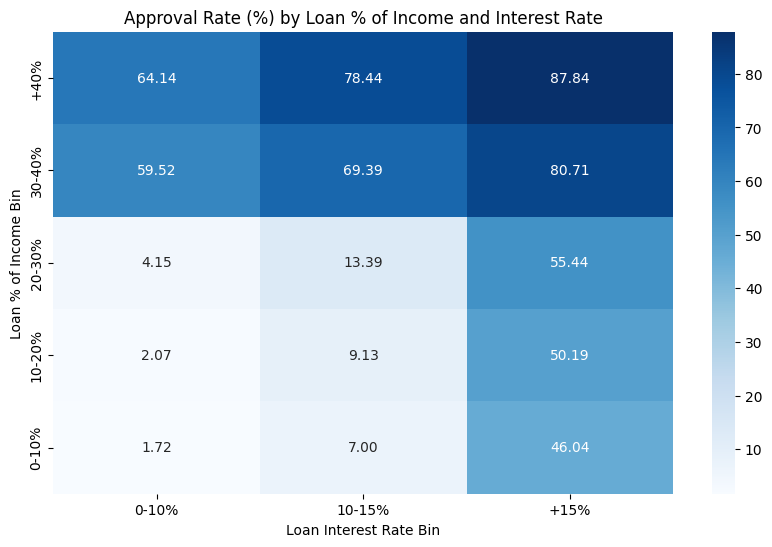

In [109]:
approval_rate = pd.crosstab(
    df['loan_percent_income_bin'],
    df['loan_int_rate_bin'],
    values=df['loan_status'],
    aggfunc='mean'
) * 100
approval_rate = approval_rate.round(2)

approval_rate_flipped = approval_rate.iloc[::-1]

plt.figure(figsize=(10, 6))
sns.heatmap(approval_rate_flipped, annot=True, cmap='Blues', fmt='.2f')
plt.title("Approval Rate (%) by Loan % of Income and Interest Rate")
plt.xlabel("Loan Interest Rate Bin")
plt.ylabel("Loan % of Income Bin")
plt.show()

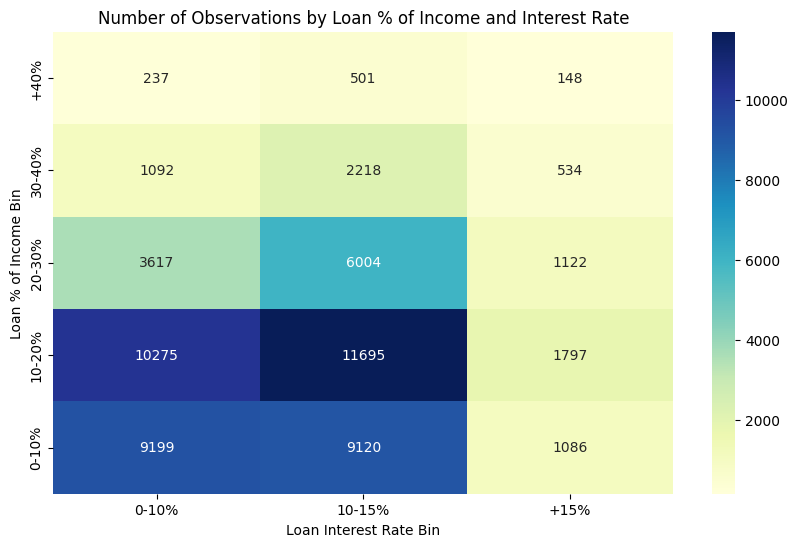

In [110]:
count_table = pd.crosstab(
    df['loan_percent_income_bin'],
    df['loan_int_rate_bin']
)

count_table_flipped = count_table.iloc[::-1]

plt.figure(figsize=(10, 6))
sns.heatmap(count_table_flipped, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Number of Observations by Loan % of Income and Interest Rate")
plt.xlabel("Loan Interest Rate Bin")
plt.ylabel("Loan % of Income Bin")
plt.show()

In [111]:
# Division into profiles

high_risk_df = df[(df['loan_int_rate'] > 15) & (df['loan_percent_income'] > 0.3)]
safe_df = df[(df['loan_int_rate'] <= 15) & (df['loan_percent_income'] <= 0.3)]

print("Number of observations for High-Risk Profile:", high_risk_df.shape[0])
print("Number of observations for Safe Profile:", safe_df.shape[0])

Number of observations for High-Risk Profile: 682
Number of observations for Safe Profile: 49910


**Key Insights:**

---

1. **Loan approvals are more common** among applicants who allocated **more than 30% of their income** towards loan repayment.  

2. Applicants with **high-interest rates (15% and above)** and a **high income percentage (40% and above)** had the highest approval rates (**87.84%**).  

3. Conversely, applicants who allocated **less than 10% of their income** and requested **low-interest rates** faced **high rejection rates**.  

4. The majority of loan applications came from individuals who allocated **10-20% of their income** with interest rates between **10-15%**. In contrast, applications from those who allocated **over 40% of their income** with **high-interest rates (15% and above)** were **almost negligible**.


**In the current dataset, I have identified two types of profiles:**  

---

1. 🔴 **High-Risk Profile:** Loan applications with an **interest rate above 15%** and a **percentage of income allocated to the loan above 30%**. This profile accounts for **682 observations** and shows **high approval rates**.  

2. 🟢 **Safe Profile:** Loan applications with an **interest rate between 0–15%** and a **percentage of income allocated to the loan between 0–30%**. This profile accounts for **49,910 observations** and shows **lower approval rates**, despite high demand for such loans.

## **Approval analysis by age - General**

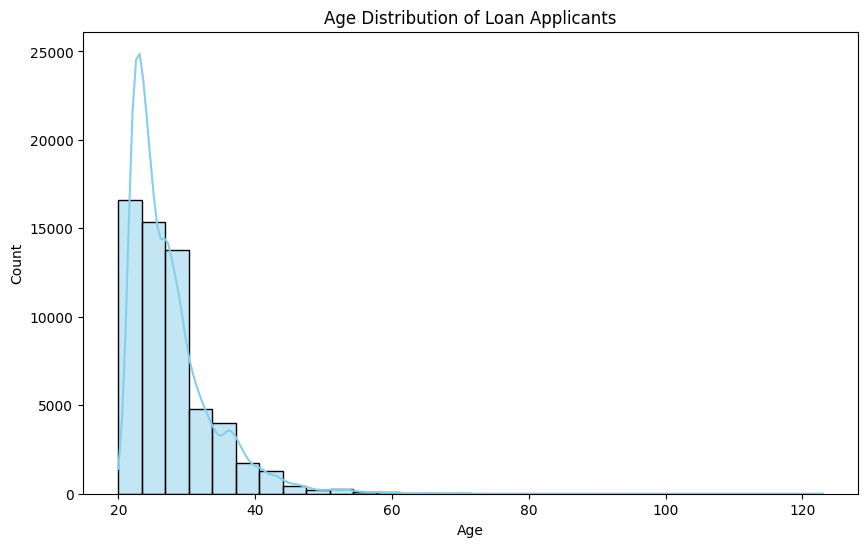

In [112]:
# Histogram displaying the age distribution.

plt.figure(figsize=(10,6))
sns.histplot(df['person_age'], bins=30, kde=True, color="skyblue")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Loan Applicants')
plt.show()

<ipython-input-113-f93fb103a0c3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status'] == 1]['person_age'], label='Approved', shade=True, color="green")
<ipython-input-113-f93fb103a0c3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status'] == 0]['person_age'], label='Rejected', shade=True, color="red")


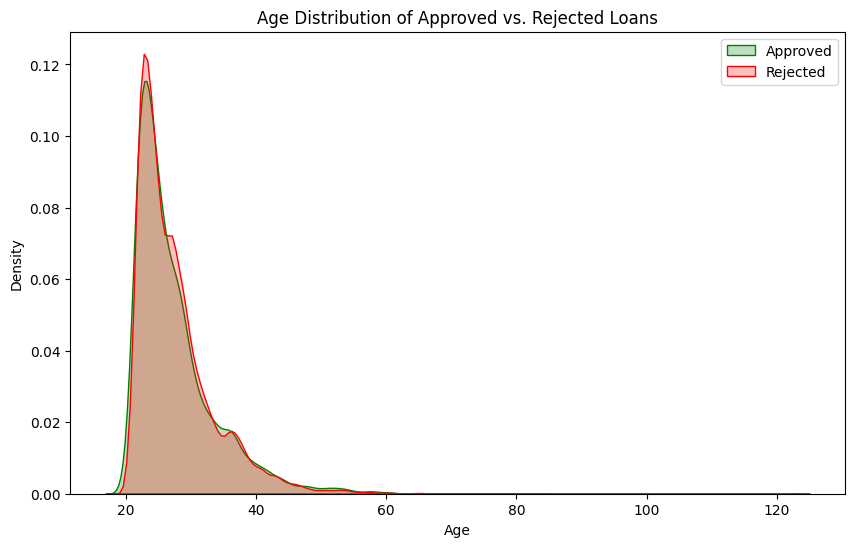

In [113]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['loan_status'] == 1]['person_age'], label='Approved', shade=True, color="green")
sns.kdeplot(df[df['loan_status'] == 0]['person_age'], label='Rejected', shade=True, color="red")
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Approved vs. Rejected Loans')
plt.legend()
plt.show()

In [114]:
df['age_group'] = pd.cut(df['person_age'], bins=[20, 25, 30, 40, 50, 130], labels=['20-25', '26-30', '31-40', '41-50', '50+'])

In [115]:
Age_based_approval = pd.crosstab(df['age_group'], df['loan_status'], normalize='index') * 100
Age_based_approval.columns = ['Rejected (%)', 'Approved (%)']

<Figure size 1000x600 with 0 Axes>

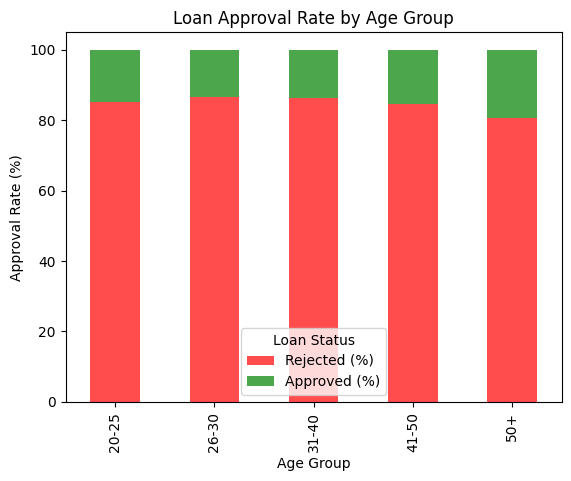

In [116]:
plt.figure(figsize=(10,6))
Age_based_approval.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Approval Rate (%)')
plt.title('Loan Approval Rate by Age Group')
plt.legend(title="Loan Status")
plt.show()

In [117]:
correlation_age_loan = df[['person_age', 'loan_status']].corr()
print("Correlation between Age and Loan Approval:")
print(correlation_age_loan)

Correlation between Age and Loan Approval:
             person_age  loan_status
person_age      1.00000     -0.00113
loan_status    -0.00113      1.00000


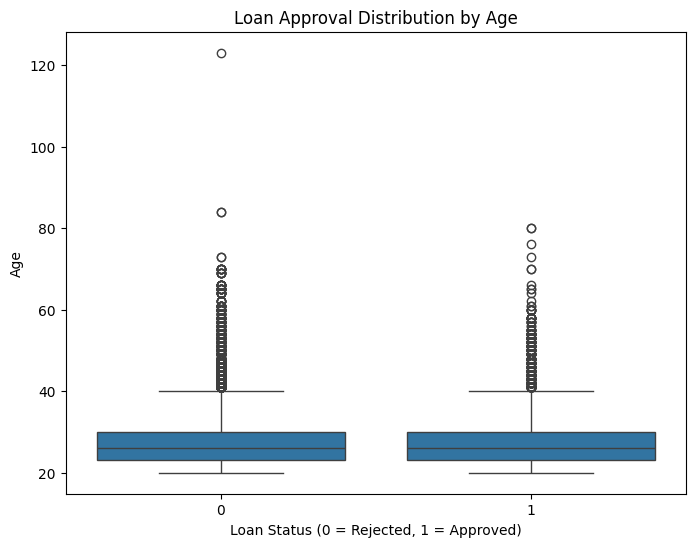

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['loan_status'], y=df['person_age'])
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Age')
plt.title('Loan Approval Distribution by Age')
plt.show()

**Age Insights:**

---

1.  Very low correlation between age and loan approval (-0.001), meaning age has almost no impact on the bank's decision-making.
2. Most loan applicants are young, primarily between the ages of 20-30.
3. No significant differences between age groups, but applicants aged 50+ receive slightly more approvals compared to other groups.
4. The median age of approved and rejected applicants is nearly identical, reinforcing that age does not play a significant role in loan approval decisions.



## **High-Risk Profile (Age & Loan Grade)**


High-Risk Profile – Includes loan applicants with an interest rate above 15% and a loan repayment percentage of income above 30%.

**Loan Grade High Risk**

In [119]:
# Loan-Grade value count in the High Risk profile.

high_risk_df["loan_grade"].value_counts()

,count
loan_grade,
D,409
E,190
F,40
C,26
G,17


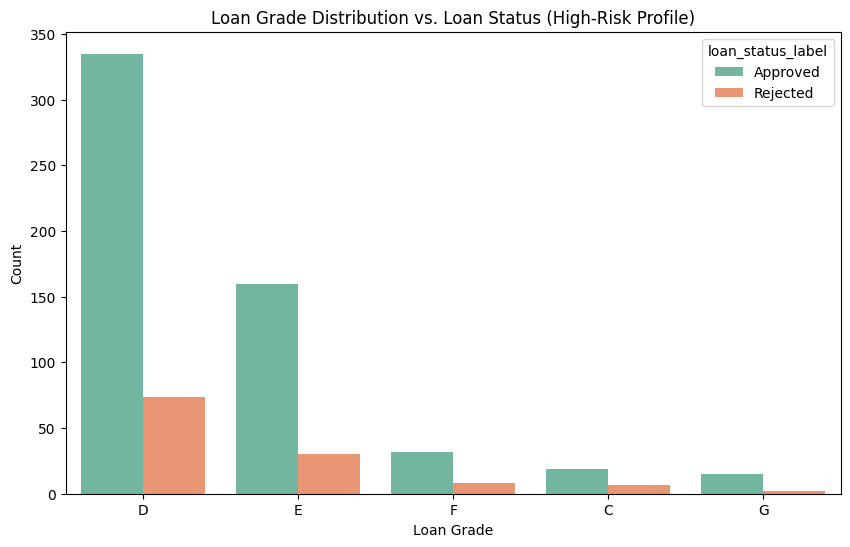

In [120]:
# Distribution of loan grades among applicants in the High-Risk Profile.

plt.figure(figsize=(10, 6))
sns.countplot(data=high_risk_df, x='loan_grade', hue='loan_status_label', palette='Set2')
plt.title("Loan Grade Distribution vs. Loan Status (High-Risk Profile)")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.show()

In [121]:
# Percentage distribution of credit approvals in the High-Risk profile.

loan_grade_distribution_High_risk = high_risk_df['loan_grade'].value_counts(normalize=True) * 100
print("Loan Grade Distribution in Safe Profile (%):")
print(loan_grade_distribution_High_risk.round(2))

Loan Grade Distribution in Safe Profile (%):
loan_grade
D    59.97
E    27.86
F     5.87
C     3.81
G     2.49
Name: proportion, dtype: float64


In [122]:
# Count of Approved Loans by Credit Grade in High-Risk profile.

accepted_high_risk = high_risk_df[high_risk_df['loan_status'] == 1]
accepted_grades_count = accepted_high_risk["loan_grade"].value_counts()
print(accepted_grades_count)

loan_grade
D    335
E    160
F     32
C     19
G     15
Name: count, dtype: int64


In [123]:
# Loan approval percentages for each credit rating in the safe profile.

approval_rate_high_risk = pd.crosstab(high_risk_df['loan_grade'], high_risk_df['loan_status'], normalize='index') * 100
approval_rate_high_risk.columns = ['Rejected (%)', 'Approved (%)']

print("Approval Rate by Loan Grade in Safe Profile (%):")
print(approval_rate_high_risk.round(2))

Approval Rate by Loan Grade in Safe Profile (%):
            Rejected (%)  Approved (%)
loan_grade                            
C                  26.92         73.08
D                  18.09         81.91
E                  15.79         84.21
F                  20.00         80.00
G                  11.76         88.24


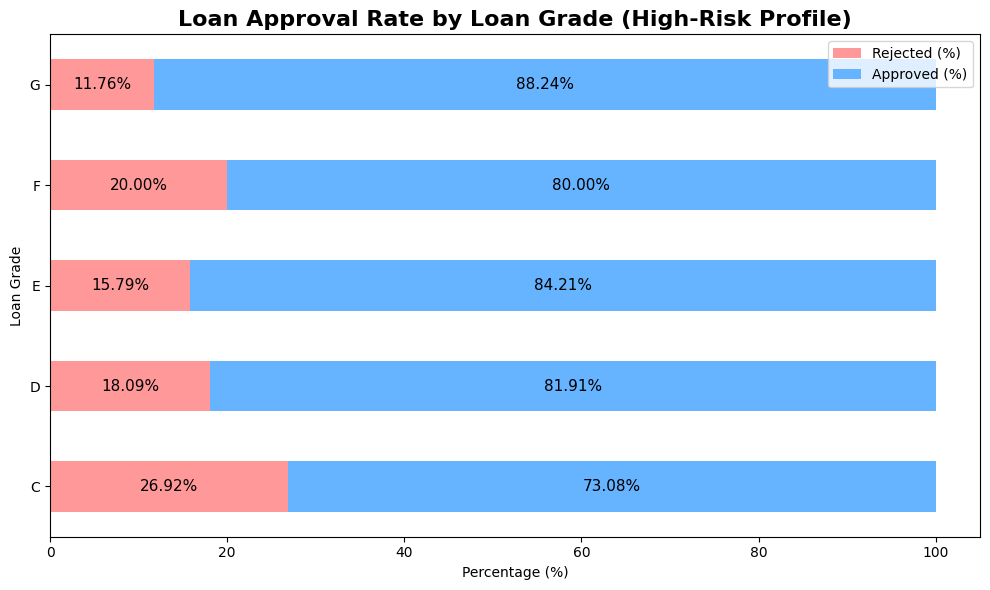

In [124]:
# Loan Approval Rate by Loan Grade (High-Risk Profile).

approval_rate_high_risk = pd.crosstab(high_risk_df['loan_grade'], high_risk_df['loan_status'], normalize='index') * 100
approval_rate_high_risk.columns = ['Rejected (%)', 'Approved (%)']

approval_rate_high_risk.plot(kind='barh', stacked=True, color=['#FF9999', '#66B3FF'], figsize=(10, 6))

plt.title('Loan Approval Rate by Loan Grade (High-Risk Profile)', fontsize=16, fontweight='bold')
plt.xlabel('Percentage (%)')
plt.ylabel('Loan Grade')

for index, value in enumerate(approval_rate_high_risk.values):
    plt.text(value[0]/2, index, f"{value[0]:.2f}%", va='center', ha='center', color='black', fontsize=11)
    plt.text(value[0] + value[1]/2, index, f"{value[1]:.2f}%", va='center', ha='center', color='black', fontsize=11)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**Age-based approval in the High-Risk profile**

In order to have enough observations (over 30) in the High-Risk profile for each age group, the groups we created are 20-30, 31-37, 37+

In [125]:
correlation_risky = high_risk_df[['person_age', 'loan_status']].corr()
print("Correlation in High-Risk Profile:")
print(correlation_risky)

Correlation in High-Risk Profile:
             person_age  loan_status
person_age     1.000000    -0.024819
loan_status   -0.024819     1.000000


In [126]:
print(high_risk_df['loan_status'].value_counts())

loan_status
1    561
0    121
Name: count, dtype: int64


In [127]:
df['age_group_adjusted'] = pd.cut(df['person_age'], bins=[20, 30, 37, 130], labels=['20-30', '31-37', '37+'], right=False)

high_risk_df = df[(df['loan_int_rate'] > 15) & (df['loan_percent_income'] > 0.30)]

age_group_counts_high_risk = high_risk_df['age_group_adjusted'].value_counts()

print("Number of loan applications per adjusted age group (High-Risk Profile):")
print(age_group_counts_high_risk)

Number of loan applications per adjusted age group (High-Risk Profile):
age_group_adjusted
20-30    511
31-37    119
37+       52
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

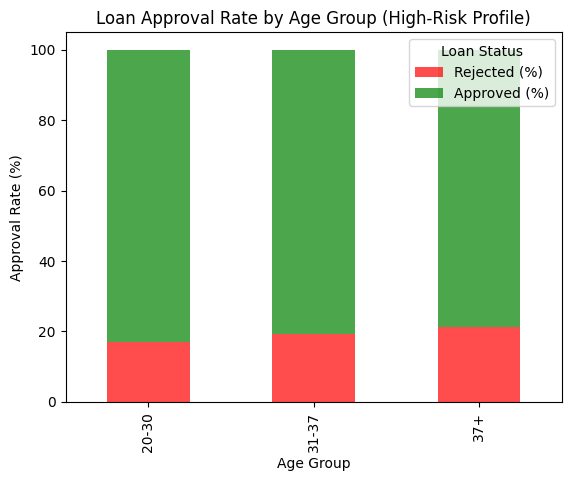

In [128]:
approval_risk = pd.crosstab(high_risk_df['age_group_adjusted'], high_risk_df['loan_status'], normalize='index') * 100

plt.figure(figsize=(10,6))
approval_risk.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Approval Rate (%)')
plt.title('Loan Approval Rate by Age Group (High-Risk Profile)')
plt.legend(title="Loan Status", labels=['Rejected (%)', 'Approved (%)'])
plt.show()

## **Safe Profie (Age & Loan Grade)**

Includes loan applicants with an interest rate below 15% and a loan repayment percentage of income below 30%.

In [129]:
# Loan-Grade value count in the safe profile.

safe_df["loan_grade"].value_counts()

,count
loan_grade,
A,19932
B,18584
C,9689
D,1676
E,29


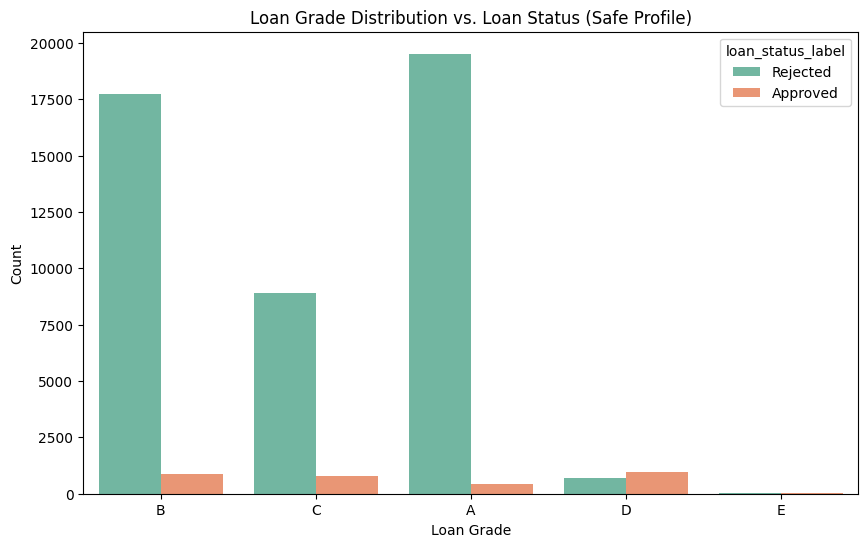

In [130]:
plt.figure(figsize=(10,6))
sns.countplot(data=safe_df, x='loan_grade', hue='loan_status_label', palette='Set2')
plt.title("Loan Grade Distribution vs. Loan Status (Safe Profile)")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.show()

In [131]:
# Percentage distribution of credit approvals in the safe profile.

loan_grade_distribution_safe = safe_df['loan_grade'].value_counts(normalize=True) * 100
print("Loan Grade Distribution in Safe Profile (%):")
print(loan_grade_distribution_safe.round(2))

Loan Grade Distribution in Safe Profile (%):
loan_grade
A    39.94
B    37.24
C    19.41
D     3.36
E     0.06
Name: proportion, dtype: float64


In [132]:
# Count of Approved Loans by Credit Grade in the Safe Profile.

accepted_safe_risk = safe_df[safe_df['loan_status'] == 1]
accepted_grades_count = accepted_safe_risk["loan_grade"].value_counts()
print(accepted_grades_count)

loan_grade
D    961
B    874
C    765
A    415
E     16
Name: count, dtype: int64


In [133]:
# Loan approval percentages for each credit rating in the safe profile.

approval_rate_safe = pd.crosstab(safe_df['loan_grade'], safe_df['loan_status'], normalize='index') * 100
approval_rate_safe.columns = ['Rejected (%)', 'Approved (%)']

print("Approval Rate by Loan Grade in Safe Profile (%):")
print(approval_rate_safe.round(2))

Approval Rate by Loan Grade in Safe Profile (%):
            Rejected (%)  Approved (%)
loan_grade                            
A                  97.92          2.08
B                  95.30          4.70
C                  92.10          7.90
D                  42.66         57.34
E                  44.83         55.17


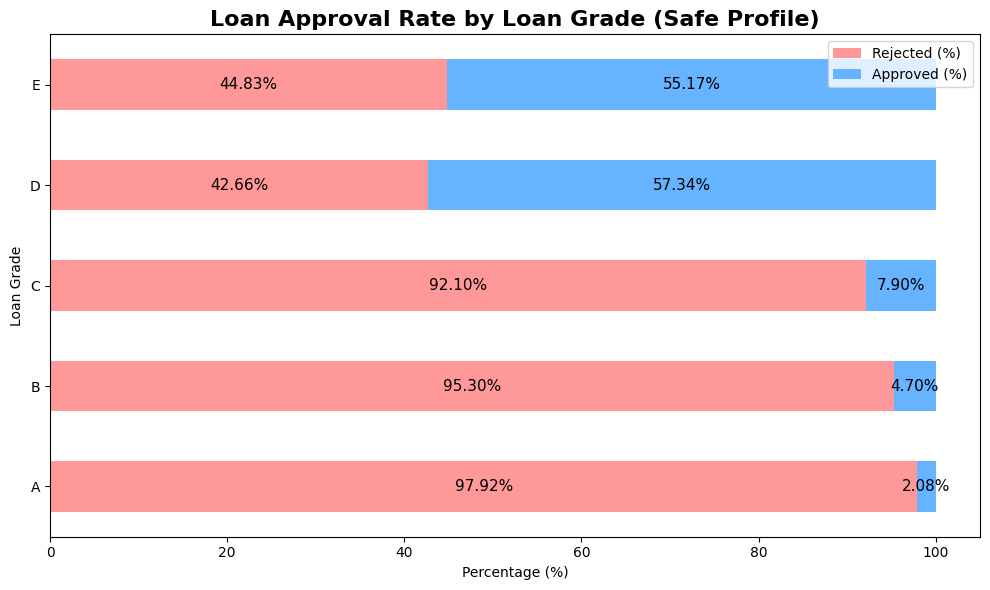

In [134]:
# Loan Approval Rate by Loan Grade (Safe Profile).

approval_rate_safe.plot(kind='barh', stacked=True, color=['#FF9999', '#66B3FF'], figsize=(10, 6))

plt.title('Loan Approval Rate by Loan Grade (Safe Profile)', fontsize=16, fontweight='bold')
plt.xlabel('Percentage (%)')
plt.ylabel('Loan Grade')

for index, value in enumerate(approval_rate_safe.values):
    plt.text(value[0]/2, index, f"{value[0]:.2f}%", va='center', ha='center', color='black', fontsize=11)
    plt.text(value[0] + value[1]/2, index, f"{value[1]:.2f}%", va='center', ha='center', color='black', fontsize=11)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**Age-based approval in the safe profile**

I matched the age groups in the Safe profile to the age groups that exist in the High-Risk profile to create a similar comparison between the profiles

In [135]:
# Correlation matrix between the applicant's age (person_age) and loan approval status (loan_status) within the Safe Profile.

correlation_safe = safe_df[['person_age', 'loan_status']].corr()
print("Correlation in Safe Profile:")
print(correlation_safe)

Correlation in Safe Profile:
             person_age  loan_status
person_age     1.000000     0.008047
loan_status    0.008047     1.000000


In [136]:
# Number of approved and rejected loans in the Safe Profile.

print(safe_df['loan_status'].value_counts())

loan_status
0    46879
1     3031
Name: count, dtype: int64


In [137]:
df['age_group_adjusted'] = pd.cut(df['person_age'], bins=[20, 30, 37, 130], labels=['20-30', '31-37', '37+'], right=False)

safe_df = df[(df['loan_int_rate'] <= 15) & (df['loan_percent_income'] <= 0.30)]

age_group_counts_safe = safe_df['age_group_adjusted'].value_counts()

print("Number of loan applications per adjusted age group (Safe Profile):")
print(age_group_counts_safe)

Number of loan applications per adjusted age group (Safe Profile):
age_group_adjusted
20-30    36876
31-37     8662
37+       4372
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

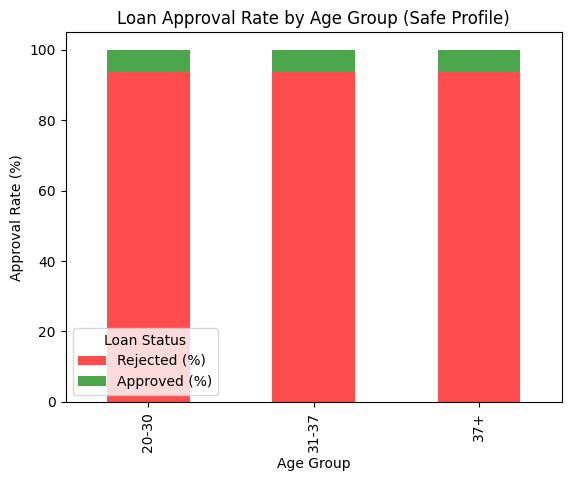

In [138]:
approval_risk = pd.crosstab(safe_df['age_group_adjusted'], safe_df['loan_status'], normalize='index') * 100

plt.figure(figsize=(10,6))
approval_risk.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Approval Rate (%)')
plt.title('Loan Approval Rate by Age Group (Safe Profile)')
plt.legend(title="Loan Status", labels=['Rejected (%)', 'Approved (%)'])
plt.show()

## Insight Conclusion

**High-Risk Profile Insights:**  

---

1. **Age Segmentation:** The majority of loan applications in the high-risk profile come from young applicants aged **20-30**, accounting for **75%** of all applications (**511 applications**).  
2. **Approval Rate:** The approval rate in the high-risk profile is **82%** (**561 applications approved**), with **no significant differences between age groups**.  
3. **Loan Grade Distribution:** The most common loan grade in this profile is **D** with **409 applications**, followed by grade **E** with **190 applications**.  
4. **Impact of Age on Loan Approval:** The correlation between age and loan approval in the high-risk profile is **-0.025**, indicating that even when considering key variables (like income percentage allocated for repayment and interest rate), **age remains an insignificant factor** in the bank's decision-making process.  
5. **Age Impact on Approval Rate:** There is **no significant change in approval rates between age groups**. As age increases, there is a **slight decline** in approval rates, but the difference is not substantial.  


**Safe Profile Insights:**  

---

1. **Age Segmentation:** The majority of loan applications in the safe profile come from applicants aged **20-30**, accounting for **73%** of all applications (**36,876 applications**). The **31-37** age group represents **17%** (**8,662 applications**), while those aged **37+** account for **10%** (**4,372 applications**).  
2. **Loan Grade Distribution:** The most common loan grades are **A (39.94%)** and **B (37.24%)**, while lower grades like **C (19.41%)**, **D (3.36%)**, and **E (0.06%)** appear less frequently.  
3. **Approval Rate by Loan Grade:** Grades **A** and **B** show **very low approval rates** of **2.08%** and **4.70%**, respectively. In contrast, lower grades like **D (57.34%)** and **E (55.17%)** demonstrate **higher approval rates**.  
4. **Impact of Age on Loan Approval:** The correlation between age and loan approval in this profile is **0.008**, indicating **no significant relationship** between the applicant's age and the likelihood of loan approval.  
5. **Age Impact on Approval Rate:** There is **no significant change** in approval rates across different age groups in the safe profile.  

**Conclusion:**  

---

The analysis indicates that in both profiles (high-risk and safe), age and credit grade are not significant factors in approval decisions, as there is no substantial change in approval rates across age groups. In the high-risk profile, approval rates are particularly high, even for low credit grades. In contrast, in the safe profile, approval rates are lower despite higher credit grades. This suggests that the bank does not consider credit grade and age when deciding whether to approve a loan.

# **Impact of Income, Loan Amount, and Employment Stability on Loan Approval**

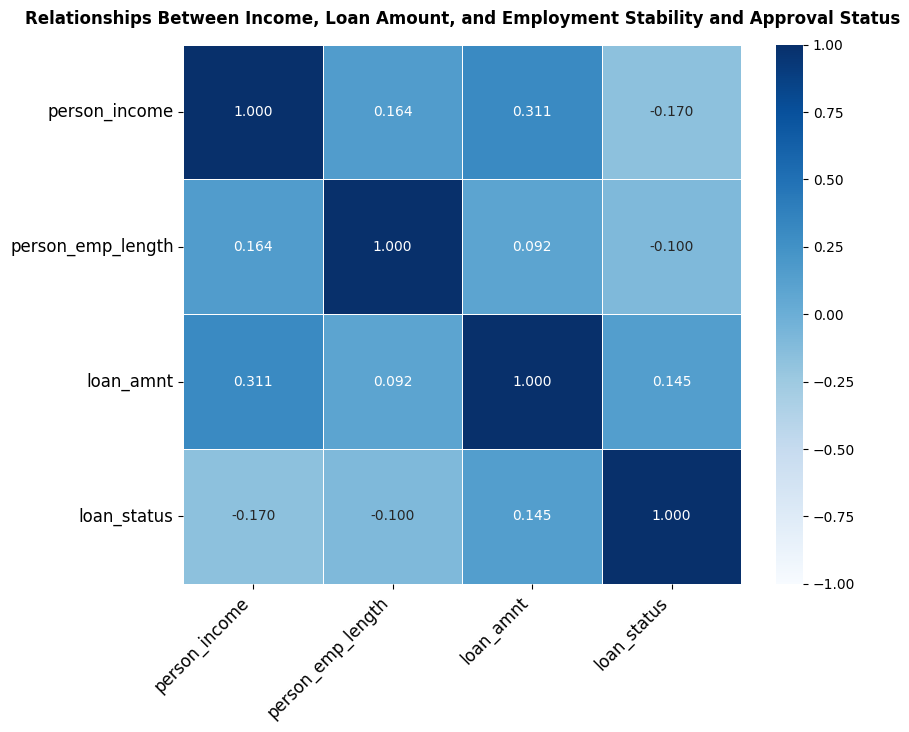

In [139]:
# Calculate the correlation matrix between income, employment duration, loan amount, and loan approval status.

numeric_cols_corr = [
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_status'
]

corr_matrix_impact = df[numeric_cols_corr].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix_impact, annot=True, cmap='Blues', fmt=".3f", linewidths=0.5, vmin=-1, vmax=1)


plt.title("Relationships Between Income, Loan Amount, and Employment Stability and Approval Status", fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

In [140]:
print(f'The person with the highest income: {df["person_income"].max()} ')
print(f'The person with the lowest income: {df["person_income"].min()} ')

The person with the highest income: 1900000 
The person with the lowest income: 4200 


In [141]:
print(f'The person with the highest loan request: {df["loan_amnt"].max()} ')
print(f'The person with the lowest loan request: {df["loan_amnt"].min()} ')

The person with the highest loan request: 35000 
The person with the lowest loan request: 500 


In [142]:
income_median = df['person_income'].median()
emp_median = df['person_emp_length'].median()
loan_median = df['loan_amnt'].median()
print(f"Median annual Income: {income_median}")
print(f"Median Employment Length: {emp_median}")
print(f'Median Loan amount: {loan_median} ')

Median annual Income: 58000.0
Median Employment Length: 4.0
Median Loan amount: 8000.0 


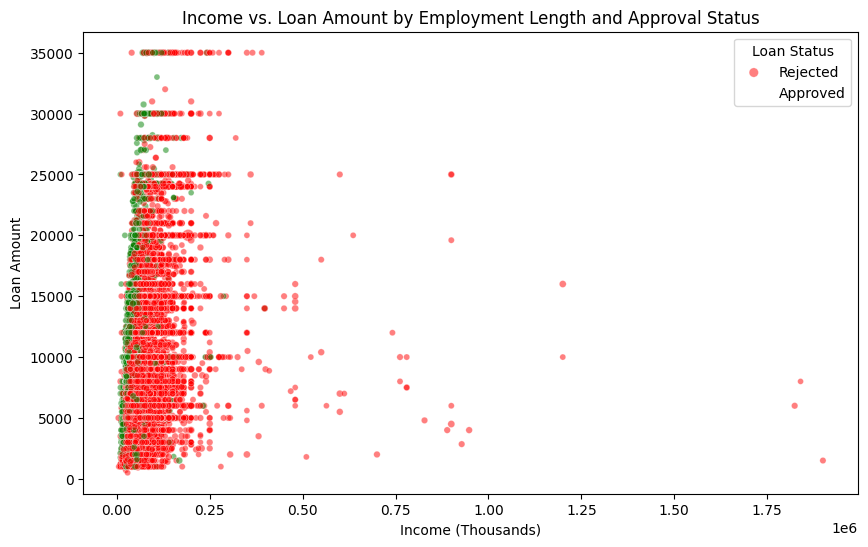

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', size='person_emp_length', hue='loan_status', alpha=0.5, palette=['red','green'])
plt.title('Income vs. Loan Amount by Employment Length and Approval Status')
plt.xlabel('Income (Thousands)')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

**The Relationship Between Financial Stability and Loan Approvals**

In [144]:
# Distribution by financial stability (based on income and employment experience)

def categorize(row):
    if row['person_income'] >= income_median and row['person_emp_length'] >= emp_median:
        return 'Stable'
    elif row['person_income'] < income_median and row['person_emp_length'] < emp_median:
        return 'Less Stable'
    else:
        return 'Medium'

In [145]:
df['financial_stability'] = df.apply(categorize, axis=1)

In [146]:
df['financial_stability'].describe()

,financial_stability
count,58645
unique,3
top,Medium
freq,25234


In [147]:
print(df['financial_stability'].value_counts())

financial_stability
Medium         25234
Stable         18165
Less Stable    15246
Name: count, dtype: int64


<ipython-input-148-4cfcc011a041>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stability_counts.index, y=stability_counts.values, palette=['green', 'orange', 'red'])


Text(0, 0.5, 'Number of Applicants')

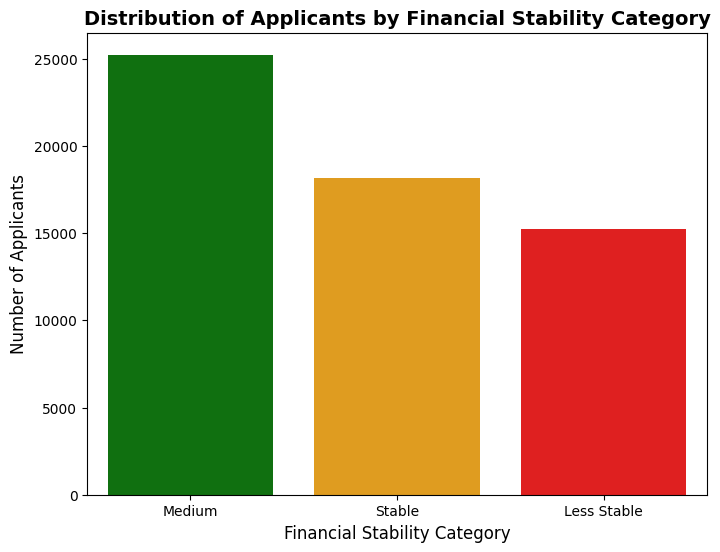

In [148]:
stability_counts = df['financial_stability'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=stability_counts.index, y=stability_counts.values, palette=['green', 'orange', 'red'])
plt.title("Distribution of Applicants by Financial Stability Category", fontsize=14, fontweight='bold')
plt.xlabel("Financial Stability Category", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)

                     Rejected (%)  Approved (%)
financial_stability                            
Less Stable                 74.92         25.08
Medium                      86.74         13.26
Stable                      93.49          6.51


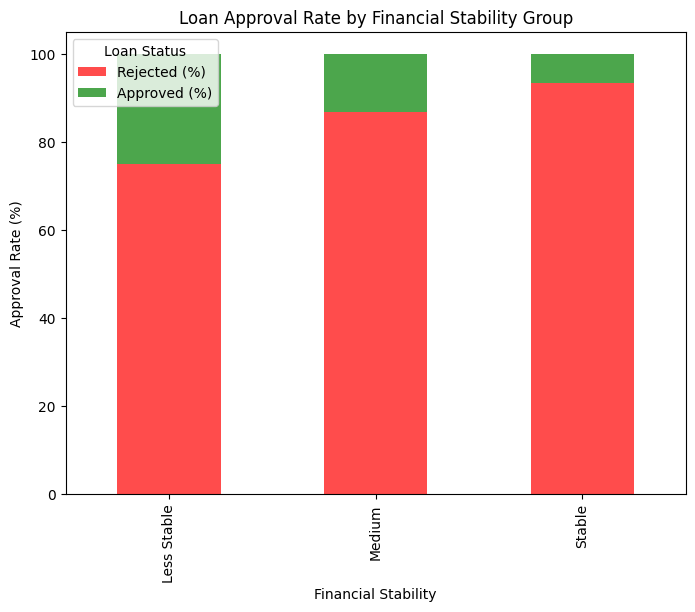

In [149]:
stability_approval = pd.crosstab(df['financial_stability'], df['loan_status'], normalize='index') * 100
stability_approval.columns = ['Rejected (%)', 'Approved (%)']
print(stability_approval.round(2))

stability_approval.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7, figsize=(8,6))
plt.title('Loan Approval Rate by Financial Stability Group')
plt.xlabel('Financial Stability')
plt.ylabel('Approval Rate (%)')
plt.legend(title='Loan Status')
plt.show()

Average and Median Loan Amount by Financial Stability Group:
                         mean   median
financial_stability                   
Less Stable           7087.03   6000.0
Medium                9197.98   8000.0
Stable               11032.92  10000.0


<ipython-input-150-a3596fd956db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['financial_stability'], y=df['loan_amnt'], palette=['red', 'orange', 'green'])


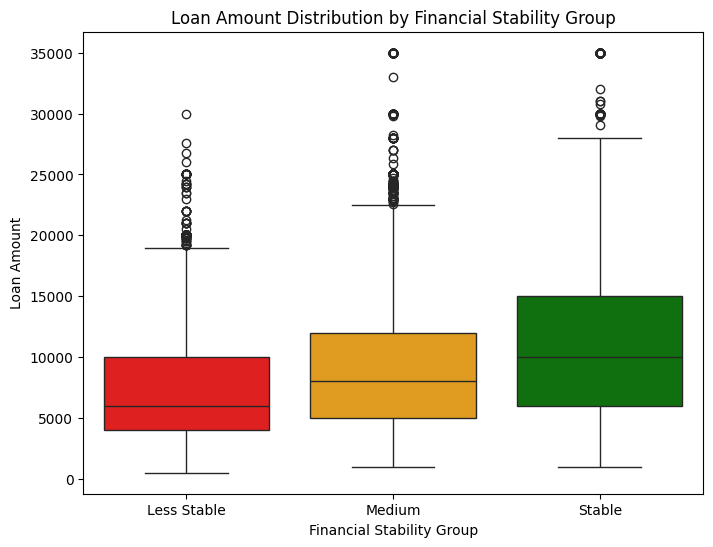

In [150]:
loan_amount_stats = df.groupby('financial_stability')['loan_amnt'].agg(['mean', 'median']).round(2)

print("Average and Median Loan Amount by Financial Stability Group:")
print(loan_amount_stats)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['financial_stability'], y=df['loan_amnt'], palette=['red', 'orange', 'green'])
plt.title('Loan Amount Distribution by Financial Stability Group')
plt.xlabel('Financial Stability Group')
plt.ylabel('Loan Amount')
plt.show()



1.  The more financially stable the applicants (Stable), the higher the loan amounts they tend to request.
2.   Less stable applicants (Less Stable) typically request smaller loans.
3. Outliers exist in all categories, representing exceptionally high loan requests (e.g., $30,000–$35,000).
4. Among stable applicants, the loan amount distribution is wider, meaning some request significantly larger loans.



In [151]:
# Because the distribution of interest rates is not too extreme, the average will better reflect the differences between financial stability groups.

average_interest_rate = df.groupby('financial_stability')['loan_int_rate'].mean().round(2)
print(average_interest_rate)

financial_stability
Less Stable    11.18
Medium         10.65
Stable         10.30
Name: loan_int_rate, dtype: float64


In [152]:
# Calculation of approval and rejection rates for each loan amount category.

average_loan_percent_income_rate = df.groupby('financial_stability')['loan_percent_income'].mean().round(2)
print(average_loan_percent_income_rate)

financial_stability
Less Stable    0.18
Medium         0.16
Stable         0.13
Name: loan_percent_income, dtype: float64


<ipython-input-153-aa4974e5455c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='financial_stability', y='loan_int_rate', data=df, ax=axes[0], palette="Blues")
<ipython-input-153-aa4974e5455c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='financial_stability', y='loan_percent_income', data=df, ax=axes[1], palette="Oranges")


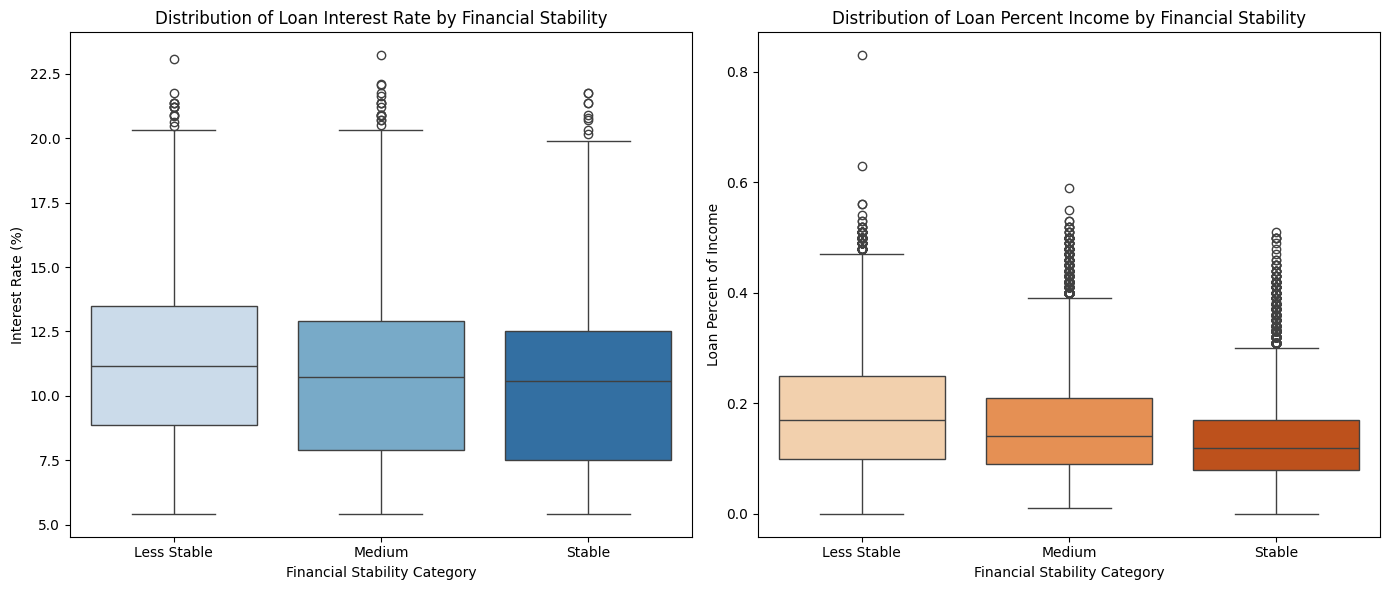

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Distribution of loan interest by financial stability.

sns.boxplot(x='financial_stability', y='loan_int_rate', data=df, ax=axes[0], palette="Blues")
axes[0].set_title("Distribution of Loan Interest Rate by Financial Stability", fontsize=12)
axes[0].set_xlabel("Financial Stability Category")
axes[0].set_ylabel("Interest Rate (%)")

# Distribution of percentage of income allocated to loan repayment by financial stability.

sns.boxplot(x='financial_stability', y='loan_percent_income', data=df, ax=axes[1], palette="Oranges")
axes[1].set_title("Distribution of Loan Percent Income by Financial Stability", fontsize=12)
axes[1].set_xlabel("Financial Stability Category")
axes[1].set_ylabel("Loan Percent of Income")

plt.tight_layout()
plt.show()

**Key Insights:**

---

1. **Loan Amount by Financial Stability:** Applicants with higher financial stability (Stable) tend to request higher loan amounts, while less stable applicants (Less Stable) typically request smaller loans. Exceptions exist in all categories, with some applicants requesting exceptionally high amounts (30,000-35,000).
2. **Interest Rate by Financial Stability:** Less stable applicants receive higher interest rates (11.18%), while the most stable applicants receive lower rates (10.30%). The difference is relatively small, suggesting that financial stability influences interest rates but is not the primary determining factor.
3. **Income Percentage for Loan Repayment:** The more financially stable the applicant, the lower the percentage of income allocated for loan repayment—18% for less stable, 16% for medium, and 13% for stable applicants. This supports the understanding that less stable applicants take loans under less favorable conditions.
4. **Employment Stability Impact:** The correlation between employment length and loan approval is very low (-0.1), indicating that employment stability does not significantly influence approval decisions.
5. **Approval Rate by Financial Stability:** The analysis reveals that less stable applicants have the highest approval rates, contrary to expectations. This suggests that financial stability is not the decisive factor in the loan approval process.

**Conclusion:**

---

The analysis indicates that applicants with higher financial stability tend to request higher loan amounts, pay lower interest rates, and allocate a smaller percentage of their income for loan repayment. However, surprisingly, it is the less stable applicants who have the highest approval rates, suggesting that financial stability is not the decisive factor in approval decisions. Additionally, employment stability does not significantly impact approval likelihood. These findings suggest that the bank relies on other factors when making loan approval decisions.

# **How Do Financial Stability and Loan Amount Impact Approval Chances?**

In [154]:
loan_median = df['loan_amnt'].median()
print(f"Median Loan amount: {loan_median} ")

Median Loan amount: 8000.0 


In [155]:
# Counts loans below and above the median

low_loans_count = (df['loan_amnt'] <= loan_median).sum()
high_loans_count = (df['loan_amnt'] > loan_median).sum()

print(f"Number of loans less than or equal to the median ({loan_median}): {low_loans_count}")
print(f"Number of loans greater than the median ({loan_median}): {high_loans_count}")

Number of loans less than or equal to the median (8000.0): 30694
Number of loans greater than the median (8000.0): 27951


In [156]:
# Categorizes loan amounts based on the median.

df['loan_amount_group'] = pd.cut(df['loan_amnt'], bins=[0, loan_median, df['loan_amnt'].max()], labels=['Low Loan (<= 8K)', 'High Loan (> 8K)'])

In [157]:
# Calculates approval and rejection rates by loan amount group.

approval_by_loan_amount = pd.crosstab(df['loan_amount_group'], df['loan_status'], normalize='index') * 100
approval_by_loan_amount.columns = ['Rejected (%)', 'Approved (%)']

In [158]:
print(approval_by_loan_amount)

                   Rejected (%)  Approved (%)
loan_amount_group                            
Low Loan (<= 8K)      89.626637     10.373363
High Loan (> 8K)      81.517656     18.482344


<Figure size 800x600 with 0 Axes>

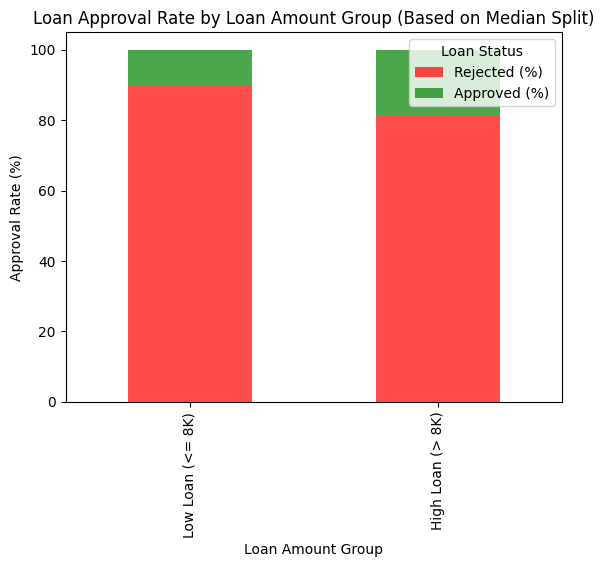

In [159]:
plt.figure(figsize=(8,6))
approval_by_loan_amount.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.xlabel('Loan Amount Group')
plt.ylabel('Approval Rate (%)')
plt.title('Loan Approval Rate by Loan Amount Group (Based on Median Split)')
plt.legend(title="Loan Status")
plt.show()

In [160]:
# Categorizes loans into two groups: Low (≤ 8K) and High (> 8K) based on the median.

loan_median = df['loan_amnt'].median()
df['loan_size_category'] = df['loan_amnt'].apply(lambda x: 'Low Loan (<= 8K)' if x <= loan_median else 'High Loan (> 8K)')

In [161]:
# Creates a table of loan approval and rejection rates by financial stability and loan size in percentages.

approval_by_stability_and_loan = pd.crosstab([df['financial_stability'], df['loan_size_category']], df['loan_status'], normalize='index') * 100
approval_by_stability_and_loan.columns = ['Rejected (%)', 'Approved (%)']

In [162]:
print(approval_by_stability_and_loan.round(2))

                                        Rejected (%)  Approved (%)
financial_stability loan_size_category                            
Less Stable         High Loan (> 8K)           59.17         40.83
                    Low Loan (<= 8K)           82.35         17.65
Medium              High Loan (> 8K)           81.19         18.81
                    Low Loan (<= 8K)           91.87          8.13
Stable              High Loan (> 8K)           91.85          8.15
                    Low Loan (<= 8K)           95.99          4.01


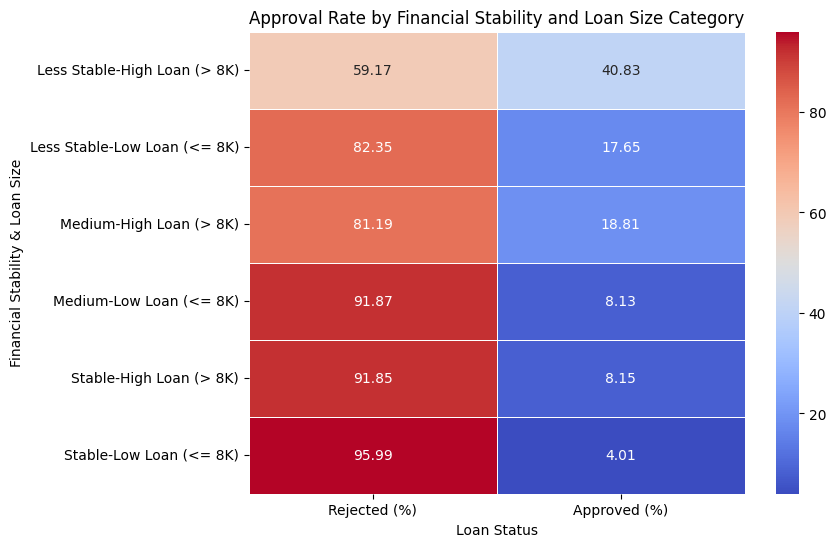

In [163]:
plt.figure(figsize=(8, 6))
sns.heatmap(approval_by_stability_and_loan, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Approval Rate by Financial Stability and Loan Size Category')
plt.xlabel('Loan Status')
plt.ylabel('Financial Stability & Loan Size')

plt.show()

In [164]:
# Calculates the correlation between loan amount and loan approval for each financial stability group.

correlations = df.groupby('financial_stability')[['loan_amnt', 'loan_status']].corr().iloc[0::2, -1]
print(correlations)

financial_stability           
Less Stable          loan_amnt    0.284769
Medium               loan_amnt    0.209264
Stable               loan_amnt    0.191996
Name: loan_status, dtype: float64


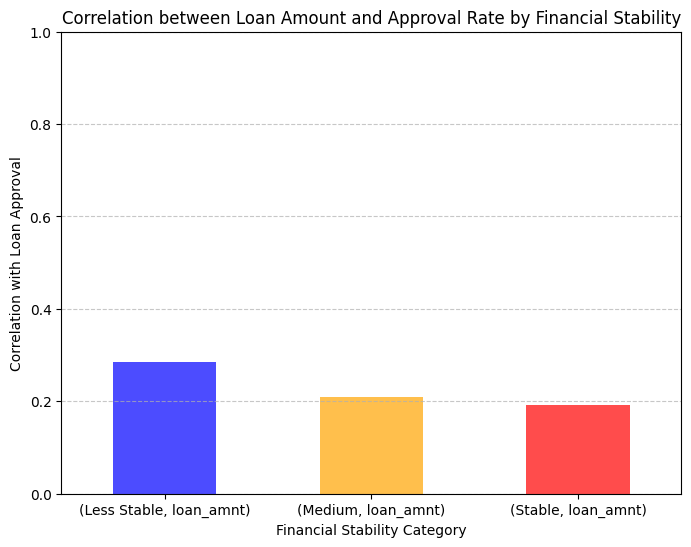

In [165]:
plt.figure(figsize=(8,6))
correlations.plot(kind='bar', color=['blue', 'orange', 'red'], alpha=0.7)
plt.xlabel('Financial Stability Category')
plt.ylabel('Correlation with Loan Approval')
plt.title('Correlation between Loan Amount and Approval Rate by Financial Stability')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

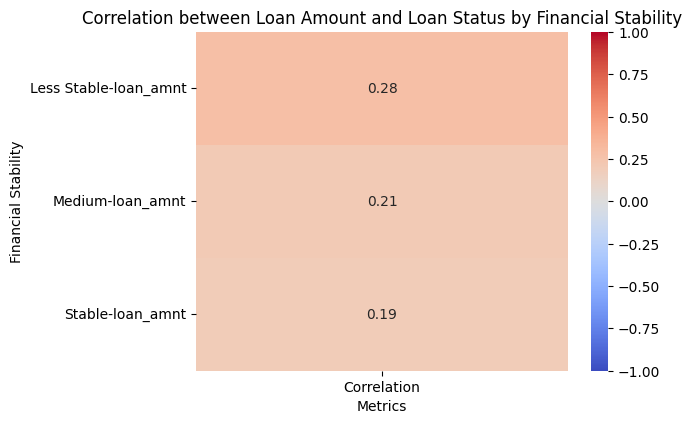

In [166]:
corr_df = correlations.to_frame(name='Correlation')

plt.figure(figsize=(6, len(corr_df)*0.8 + 2))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation between Loan Amount and Loan Status by Financial Stability')
plt.xlabel('Metrics')
plt.ylabel('Financial Stability')
plt.show()

**Key Insights on How Financial Stability and Loan Amount Impact Approval Chances:**

---

1. **Loan Amount and Approval Rates:** Applicants requesting higher loan amounts (>8K) have a higher approval rate (18.48%) compared to those requesting lower loan amounts (<=8K) with an approval rate of 10.37%. This suggests that larger loan requests are more likely to be approved.

2. **Financial Stability Impact:** Less stable applicants with high loan amounts exhibit the highest approval rate (40.83%) compared to medium (18.81%) and stable applicants (8.15%). This indicates that less stable applicants are paradoxically favored when requesting larger loans.

3. **Correlation Between Loan Amount and Approval:** There is a positive correlation between loan amount and approval status, especially among less stable applicants (0.28). The correlation diminishes among medium (0.21) and stable applicants (0.19), implying that higher loan amounts are a stronger predictor of approval for less stable applicants.

4. **Financial Stability and Low Loan Amounts:** Applicants with lower financial stability and low loan amounts (<=8K) still experience a higher approval rate (17.65%) compared to medium (8.13%) and stable applicants (4.01%).

5. **Overall Observation:** Despite expectations, financial stability does not consistently lead to higher approval rates. Instead, less stable applicants, particularly those requesting higher loan amounts, tend to have better approval outcomes. This suggests that banks may prioritize potential profitability over stability when considering larger loan approvals.
